In [213]:
import numpy as np

num_points=1000
vectors_set=[]

for i in range(num_points):
    if np.random.random()>0.5:
        vectors_set.append([np.random.normal(0.0,0.9),
                           np.random.normal(0.0,0.9)])
    else:
        vectors_set.append([np.random.normal(3.0,0.5),
                           np.random.normal(1.0,0.5)])
#print(vectors_set)

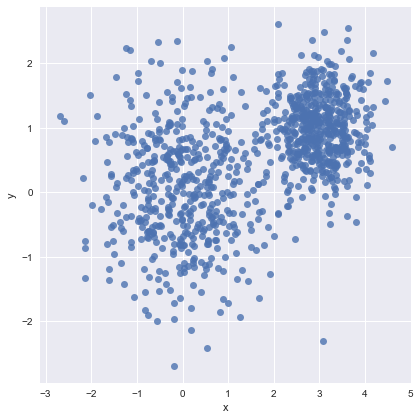

In [214]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"x":[v[0] for v in vectors_set],
                   "y":[v[1] for v in vectors_set]})
#print(df)
sns.lmplot("x","y",data=df, fit_reg=False,size=6)
plt.show()

In [215]:
import tensorflow as tf
vectors = tf.constant(vectors_set)
k = 5
centroides = tf. Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
expanded_vectors=tf.expand_dims(vectors,0)
expanded_centroides=tf.expand_dims(centroides,1)

In [220]:
assignments=tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,
        expanded_centroides)),2),0)
#means=tf.concat(0,[tf.reduce_mean(tf.gather(vectors,              #### tf v1.0 인자 위치 변경사항
#    tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),        #### 이거 살펴보지 않으면  날고생 하게됩니다.       
#    reduction_indices=[1]) for c in range(k)])                    #### https://www.tensorflow.org/api_docs/python 참조

means = tf.concat([tf.reduce_mean(tf.gather(vectors, 
     tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),
     reduction_indices=[1]) for c in range(k)], 0)                 ### Python 3.X에서 xrange가 range로 바뀜

update_centroides = tf.assign(centroides, means)
init_op = tf.global_variables_initializer()

sess=tf.Session()
sess.run(init_op)

for step in range(100):
  _,centroid_values, assignment_values=sess.run([update_centroides,
    centroides, assignments])

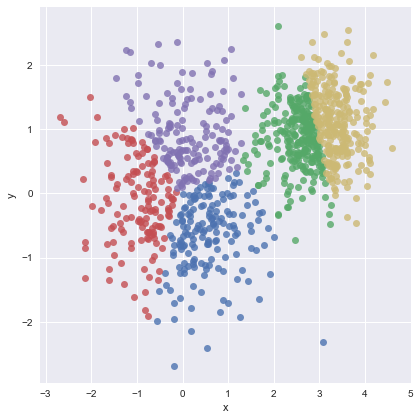

In [219]:
data={"x":[],"y":[],"cluster":[]}
for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x","y",data=df, fit_reg=False,size=6,hue="cluster",
          legend=False)
plt.show()